<a href="https://colab.research.google.com/github/a00101/datascience101/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import pandas as pd

In [206]:
df = pd.read_table("Test_sample.txt", sep="\t", index_col=0)
df.head()

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,A[C>T]G,A[C>T]T,A[T>A]A,A[T>A]C,A[T>A]G,A[T>A]T,A[T>C]A,A[T>C]C,A[T>C]G,A[T>C]T,A[T>G]A,A[T>G]C,A[T>G]G,A[T>G]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,C[C>G]A,C[C>G]C,C[C>G]G,C[C>G]T,C[C>T]A,C[C>T]C,C[C>T]G,C[C>T]T,C[T>A]A,C[T>A]C,C[T>A]G,C[T>A]T,...,G[C>T]C,G[C>T]G,G[C>T]T,G[T>A]A,G[T>A]C,G[T>A]G,G[T>A]T,G[T>C]A,G[T>C]C,G[T>C]G,G[T>C]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[C>A]A,T[C>A]C,T[C>A]G,T[C>A]T,T[C>G]A,T[C>G]C,T[C>G]G,T[C>G]T,T[C>T]A,T[C>T]C,T[C>T]G,T[C>T]T,T[T>A]A,T[T>A]C,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,Answer
MutationType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-62-8399-01A-21D-2323-08_44,7,9,5,14,0,2,5,3,5,6,15,5,0,1,0,0,4,5,4,1,0,0,4,0,15,26,13,25,1,1,3,10,8,5,23,5,0,1,16,2,...,3,14,8,0,2,4,0,3,1,0,1,0,0,0,0,21,27,8,14,29,12,6,46,44,10,15,28,0,1,0,0,2,0,1,0,0,2,3,0,LUAD
TCGA-66-2773-01A-01D-1267-08_30,7,8,4,5,3,0,1,7,11,3,9,0,0,1,2,0,3,0,9,2,0,0,0,0,6,3,5,9,2,1,6,0,18,6,12,12,0,4,3,3,...,8,4,7,2,0,2,1,1,1,7,1,1,0,0,0,14,6,2,7,69,16,0,54,91,28,52,63,1,1,2,3,0,1,5,0,0,0,0,1,LUSC
TCGA-77-8130-01A-11D-2244-08_20,2,6,1,0,3,3,5,0,10,2,1,4,0,0,0,0,2,0,5,2,0,0,0,0,6,9,2,6,8,3,1,5,5,2,8,7,0,2,4,3,...,5,7,4,3,0,1,0,1,2,1,8,0,0,1,4,0,7,1,6,3,3,0,2,4,5,4,7,0,4,0,1,3,1,3,1,0,0,0,0,LUSC
TCGA-17-Z017-01A-01W-0746-08_3,3,11,8,0,2,1,0,1,4,0,1,7,1,1,3,2,1,1,3,1,2,0,0,0,10,11,5,6,1,7,0,6,9,6,5,3,1,4,7,6,...,1,5,1,2,1,0,0,1,3,0,1,0,0,0,0,7,5,3,5,0,4,0,11,4,2,2,3,4,2,3,1,1,1,3,0,0,0,0,0,LUAD
TCGA-50-6593-01A-11D-1753-08_10,8,8,2,11,2,2,6,1,3,4,2,3,0,2,4,4,2,0,9,2,0,0,0,0,12,22,6,11,5,0,8,8,9,1,3,11,0,3,13,1,...,1,11,7,3,0,7,0,3,4,8,1,0,0,0,0,8,20,4,2,2,2,5,3,5,8,8,3,0,1,2,3,1,2,2,0,0,0,0,4,LUAD


In [207]:
encoded_df = pd.get_dummies(df)
encoded_df.head()


,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,A[C>T]G,A[C>T]T,A[T>A]A,A[T>A]C,A[T>A]G,A[T>A]T,A[T>C]A,A[T>C]C,A[T>C]G,A[T>C]T,A[T>G]A,A[T>G]C,A[T>G]G,A[T>G]T,C[C>A]A,C[C>A]C,C[C>A]G,C[C>A]T,C[C>G]A,C[C>G]C,C[C>G]G,C[C>G]T,C[C>T]A,C[C>T]C,C[C>T]G,C[C>T]T,C[T>A]A,C[T>A]C,C[T>A]G,C[T>A]T,...,G[T>A]A,G[T>A]C,G[T>A]G,G[T>A]T,G[T>C]A,G[T>C]C,G[T>C]G,G[T>C]T,G[T>G]A,G[T>G]C,G[T>G]G,G[T>G]T,T[C>A]A,T[C>A]C,T[C>A]G,T[C>A]T,T[C>G]A,T[C>G]C,T[C>G]G,T[C>G]T,T[C>T]A,T[C>T]C,T[C>T]G,T[C>T]T,T[T>A]A,T[T>A]C,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T,Answer_KIRD,Answer_LUAD,Answer_LUSC,Answer_PDAC
MutationType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-62-8399-01A-21D-2323-08_44,7,9,5,14,0,2,5,3,5,6,15,5,0,1,0,0,4,5,4,1,0,0,4,0,15,26,13,25,1,1,3,10,8,5,23,5,0,1,16,2,...,0,2,4,0,3,1,0,1,0,0,0,0,21,27,8,14,29,12,6,46,44,10,15,28,0,1,0,0,2,0,1,0,0,2,3,0,0,1,0,0
TCGA-66-2773-01A-01D-1267-08_30,7,8,4,5,3,0,1,7,11,3,9,0,0,1,2,0,3,0,9,2,0,0,0,0,6,3,5,9,2,1,6,0,18,6,12,12,0,4,3,3,...,2,0,2,1,1,1,7,1,1,0,0,0,14,6,2,7,69,16,0,54,91,28,52,63,1,1,2,3,0,1,5,0,0,0,0,1,0,0,1,0
TCGA-77-8130-01A-11D-2244-08_20,2,6,1,0,3,3,5,0,10,2,1,4,0,0,0,0,2,0,5,2,0,0,0,0,6,9,2,6,8,3,1,5,5,2,8,7,0,2,4,3,...,3,0,1,0,1,2,1,8,0,0,1,4,0,7,1,6,3,3,0,2,4,5,4,7,0,4,0,1,3,1,3,1,0,0,0,0,0,0,1,0
TCGA-17-Z017-01A-01W-0746-08_3,3,11,8,0,2,1,0,1,4,0,1,7,1,1,3,2,1,1,3,1,2,0,0,0,10,11,5,6,1,7,0,6,9,6,5,3,1,4,7,6,...,2,1,0,0,1,3,0,1,0,0,0,0,7,5,3,5,0,4,0,11,4,2,2,3,4,2,3,1,1,1,3,0,0,0,0,0,0,1,0,0
TCGA-50-6593-01A-11D-1753-08_10,8,8,2,11,2,2,6,1,3,4,2,3,0,2,4,4,2,0,9,2,0,0,0,0,12,22,6,11,5,0,8,8,9,1,3,11,0,3,13,1,...,3,0,7,0,3,4,8,1,0,0,0,0,8,20,4,2,2,2,5,3,5,8,8,3,0,1,2,3,1,2,2,0,0,0,0,4,0,1,0,0


In [208]:
독립 = encoded_df[["A[C>A]A","A[C>A]C","A[C>A]G","A[C>A]T","A[C>G]A","A[C>G]C","A[C>G]G","A[C>G]T","A[C>T]A","A[C>T]C","A[C>T]G","A[C>T]T","A[T>A]A","A[T>A]C","A[T>A]G","A[T>A]T","A[T>C]A","A[T>C]C","A[T>C]G","A[T>C]T","A[T>G]A","A[T>G]C","A[T>G]G","A[T>G]T","C[C>A]A","C[C>A]C","C[C>A]G","C[C>A]T","C[C>G]A","C[C>G]C","C[C>G]G","C[C>G]T","C[C>T]A","C[C>T]C","C[C>T]G","C[C>T]T","C[T>A]A","C[T>A]C","C[T>A]G","C[T>A]T","C[T>C]A","C[T>C]C","C[T>C]G","C[T>C]T","C[T>G]A","C[T>G]C","C[T>G]G","C[T>G]T","G[C>A]A","G[C>A]C","G[C>A]G","G[C>A]T","G[C>G]A","G[C>G]C","G[C>G]G","G[C>G]T","G[C>T]A","G[C>T]C","G[C>T]G","G[C>T]T","G[T>A]A","G[T>A]C","G[T>A]G","G[T>A]T","G[T>C]A","G[T>C]C","G[T>C]G","G[T>C]T","G[T>G]A","G[T>G]C","G[T>G]G","G[T>G]T","T[C>A]A","T[C>A]C","T[C>A]G","T[C>A]T","T[C>G]A","T[C>G]C","T[C>G]G","T[C>G]T","T[C>T]A","T[C>T]C","T[C>T]G","T[C>T]T","T[T>A]A","T[T>A]C","T[T>A]G","T[T>A]T","T[T>C]A","T[T>C]C","T[T>C]G","T[T>C]T","T[T>G]A","T[T>G]C","T[T>G]G","T[T>G]T"]]
종속 = encoded_df[["Answer_LUAD", "Answer_LUSC", "Answer_KIRD", "Answer_PDAC"]]

In [209]:
print(독립.shape, 종속.shape)

(1000, 96) (1000, 4)


In [212]:
# model = tf.keras.models.Sequential([
  
#   tf.keras.layer.Input(shape=[96])                                    
# ])
X = tf.keras.layers.Input(shape=[96])
H = tf.keras.layers.Dense(96*2, activation="swish")(X)
H = tf.keras.layers.Dense(96*2, activation="swish")(H)
H = tf.keras.layers.Dense(96*2, activation="swish")(H)
H = tf.keras.layers.Dense(96*2, activation="swish")(H)
Y = tf.keras.layers.Dense(4, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [213]:
history = model.fit(독립, 종속, epochs=25)

Epoch 1/25
32/32 [==============================] - 1s 5ms/step - loss: 3.6728 - accuracy: 0.4910
Epoch 2/25
32/32 [==============================] - 0s 5ms/step - loss: 1.7006 - accuracy: 0.6250
Epoch 3/25
32/32 [==============================] - 0s 4ms/step - loss: 1.4420 - accuracy: 0.6930
Epoch 4/25
32/32 [==============================] - 0s 4ms/step - loss: 1.3820 - accuracy: 0.6910
Epoch 5/25
32/32 [==============================] - 0s 4ms/step - loss: 1.1523 - accuracy: 0.7270
Epoch 6/25
32/32 [==============================] - 0s 4ms/step - loss: 1.4553 - accuracy: 0.7630
Epoch 7/25
32/32 [==============================] - 0s 4ms/step - loss: 0.9406 - accuracy: 0.7910
Epoch 8/25
32/32 [==============================] - 0s 4ms/step - loss: 0.9166 - accuracy: 0.8120
Epoch 9/25
32/32 [==============================] - 0s 4ms/step - loss: 0.9880 - accuracy: 0.8130
Epoch 10/25
32/32 [==============================] - 0s 4ms/step - loss: 0.5927 - accuracy: 0.8550
Epoch 11/25
32/32 [

In [214]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 96)]              0         
                                                                 
 dense_42 (Dense)            (None, 192)               18624     
                                                                 
 dense_43 (Dense)            (None, 192)               37056     
                                                                 
 dense_44 (Dense)            (None, 192)               37056     
                                                                 
 dense_45 (Dense)            (None, 192)               37056     
                                                                 
 dense_46 (Dense)            (None, 4)                 772       
                                                                 
Total params: 130,564
Trainable params: 130,564
Non-traina

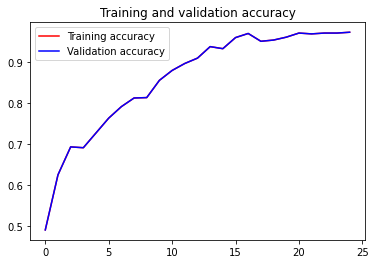

<Figure size 432x288 with 0 Axes>

In [215]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [181]:
df_test = pd.read_table("Test_sample.txt", sep="\t", index_col=0)
encoded_df_test = pd.get_dummies(df_test)
독립_test = encoded_df_test[["A[C>A]A","A[C>A]C","A[C>A]G","A[C>A]T","A[C>G]A","A[C>G]C","A[C>G]G","A[C>G]T","A[C>T]A","A[C>T]C","A[C>T]G","A[C>T]T","A[T>A]A","A[T>A]C","A[T>A]G","A[T>A]T","A[T>C]A","A[T>C]C","A[T>C]G","A[T>C]T","A[T>G]A","A[T>G]C","A[T>G]G","A[T>G]T","C[C>A]A","C[C>A]C","C[C>A]G","C[C>A]T","C[C>G]A","C[C>G]C","C[C>G]G","C[C>G]T","C[C>T]A","C[C>T]C","C[C>T]G","C[C>T]T","C[T>A]A","C[T>A]C","C[T>A]G","C[T>A]T","C[T>C]A","C[T>C]C","C[T>C]G","C[T>C]T","C[T>G]A","C[T>G]C","C[T>G]G","C[T>G]T","G[C>A]A","G[C>A]C","G[C>A]G","G[C>A]T","G[C>G]A","G[C>G]C","G[C>G]G","G[C>G]T","G[C>T]A","G[C>T]C","G[C>T]G","G[C>T]T","G[T>A]A","G[T>A]C","G[T>A]G","G[T>A]T","G[T>C]A","G[T>C]C","G[T>C]G","G[T>C]T","G[T>G]A","G[T>G]C","G[T>G]G","G[T>G]T","T[C>A]A","T[C>A]C","T[C>A]G","T[C>A]T","T[C>G]A","T[C>G]C","T[C>G]G","T[C>G]T","T[C>T]A","T[C>T]C","T[C>T]G","T[C>T]T","T[T>A]A","T[T>A]C","T[T>A]G","T[T>A]T","T[T>C]A","T[T>C]C","T[T>C]G","T[T>C]T","T[T>G]A","T[T>G]C","T[T>G]G","T[T>G]T"]]
종속_test = encoded_df_test[["Answer_LUAD", "Answer_LUSC"]]

In [182]:
inputfile = open("Test.txt")

inputfile.readline()
k = 1
correct = 0
incorrect = 0

bag_acc = []
bag_loss = []


for line in inputfile:
    elms = line.strip().split("\t")
    values = list(map(int, elms[1:97]))
    criteria = np.array([values])
    results = elms[97]

    a = model.predict(criteria)
    # print(model.predict(criteria))
    if a[0][0] > a[0][1]:
        prediction = "LUAD"
    elif a[0][0] < a[0][1]:
        prediction = "LUSC"
    
    if prediction == results:
        correct += 1
    elif prediction != results:
        incorrect += 1

    bag_acc.append(round(correct/k,2))
    bag_loss.append(round(incorrect/k,2))

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

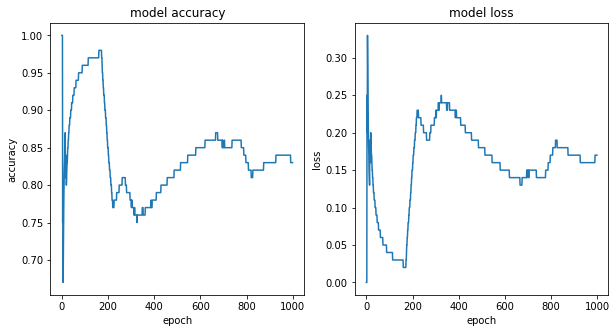

In [183]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

# 모델의 정확도를 그립니다.
ax0.plot(bag_acc) 
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')
ax1.plot(bag_loss) 
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')


In [184]:
print(round(np.mean(bag_acc)*100,2), round(np.mean(bag_loss)*100,2))

84.26 15.74


In [216]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [219]:
print(종속_test[:10])

# for i in range(Y.shape[-1]):
    # fprs, tprs, _ = roc_curve(Y[:,i], )

                                 Answer_LUAD  Answer_LUSC
MutationType                                             
TCGA-62-8399-01A-21D-2323-08_44            1            0
TCGA-66-2773-01A-01D-1267-08_30            0            1
TCGA-77-8130-01A-11D-2244-08_20            0            1
TCGA-17-Z017-01A-01W-0746-08_3             1            0
TCGA-50-6593-01A-11D-1753-08_10            1            0
TCGA-63-A5MM-01A-11D-A26M-08_48            0            1
TCGA-78-7150-01A-21D-2036-08_50            1            0
TCGA-22-1011-01A-01D-1521-08_49            0            1
C3N-00556_T_18                             1            0
TCGA-97-8547-01A-11D-2393-08_6             1            0
